In [1]:
mit_df <- read.csv("Metro_Interstate_Traffic_Volume.csv")


In [2]:
head(mit_df)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>
1,None,288.28,0,0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
2,None,289.36,0,0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
3,None,289.58,0,0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
4,None,290.13,0,0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
5,None,291.14,0,0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
6,None,291.72,0,0,1,Clear,sky is clear,2012-10-02 14:00:00,5181


In [3]:
str(mit_df)

'data.frame':	48204 obs. of  9 variables:
 $ holiday            : chr  "None" "None" "None" "None" ...
 $ temp               : num  288 289 290 290 291 ...
 $ rain_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ snow_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ clouds_all         : int  40 75 90 90 75 1 1 1 20 20 ...
 $ weather_main       : chr  "Clouds" "Clouds" "Clouds" "Clouds" ...
 $ weather_description: chr  "scattered clouds" "broken clouds" "overcast clouds" "overcast clouds" ...
 $ date_time          : chr  "2012-10-02 09:00:00" "2012-10-02 10:00:00" "2012-10-02 11:00:00" "2012-10-02 12:00:00" ...
 $ traffic_volume     : int  5545 4516 4767 5026 4918 5181 5584 6015 5791 4770 ...


In [4]:
summary(mit_df)

   holiday               temp          rain_1h            snow_1h         
 Length:48204       Min.   :  0.0   Min.   :   0.000   Min.   :0.0000000  
 Class :character   1st Qu.:272.2   1st Qu.:   0.000   1st Qu.:0.0000000  
 Mode  :character   Median :282.4   Median :   0.000   Median :0.0000000  
                    Mean   :281.2   Mean   :   0.334   Mean   :0.0002224  
                    3rd Qu.:291.8   3rd Qu.:   0.000   3rd Qu.:0.0000000  
                    Max.   :310.1   Max.   :9831.300   Max.   :0.5100000  
   clouds_all     weather_main       weather_description  date_time        
 Min.   :  0.00   Length:48204       Length:48204        Length:48204      
 1st Qu.:  1.00   Class :character   Class :character    Class :character  
 Median : 64.00   Mode  :character   Mode  :character    Mode  :character  
 Mean   : 49.36                                                            
 3rd Qu.: 90.00                                                            
 Max.   :100.00    

In [5]:
# Data Cleaning

In [6]:
# mising values
miss<- colSums(is.na(mit_df))
print(miss)


            holiday                temp             rain_1h             snow_1h 
                  0                   0                   0                   0 
         clouds_all        weather_main weather_description           date_time 
                  0                   0                   0                   0 
     traffic_volume 
                  0 


In [7]:
# duplicate rows
dup_rows <- duplicated(mit_df)
num_dup_rows <- sum(dup_rows)
print(paste("Number of duplicate rows:", num_dup_rows))


[1] "Number of duplicate rows: 17"


In [8]:
install.packages("dplyr")
install.packages("ggplot2")


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tenyj\AppData\Local\R\win-library\4.3\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\tenyj\AppData\Local\R\win-library\4.3\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpMfg7X2\downloaded_packages


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpMfg7X2\downloaded_packages


In [9]:
library(dplyr)

mit_df$holiday <- ifelse(mit_df$holiday == "None", 0, 1)
holiday_data <- mit_df$holiday
traffic_volume_data <- mit_df$traffic_volume

holiday_counts <- table(holiday_data)
holiday_traffic <- mit_df %>% 
  group_by(holiday) %>%
  summarise(Mean_Traffic_Volume = mean(traffic_volume, na.rm = TRUE))



Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Warning message:
"package 'ggplot2' was built under R version 4.3.3"


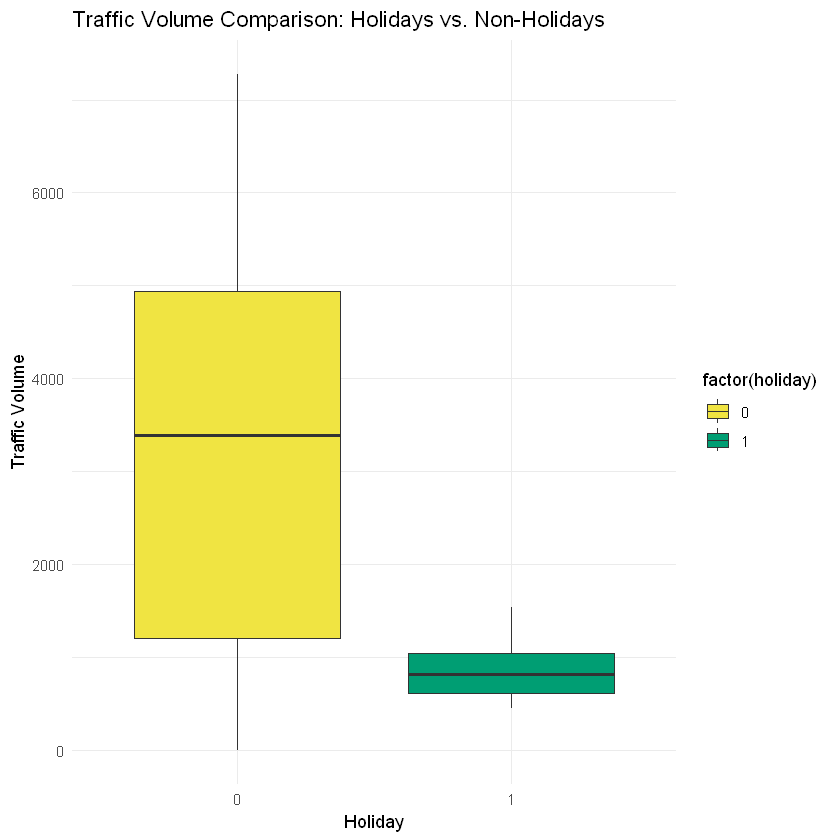

In [10]:
library(ggplot2)

# Box plot for traffic volume comparison
ggplot(mit_df, aes(factor(holiday), traffic_volume)) +
  geom_boxplot(aes(fill = factor(holiday))) +
  scale_fill_manual(values = c("#F0E442", "#009E73")) +
  labs(title = "Traffic Volume Comparison: Holidays vs. Non-Holidays",
       x = "Holiday",
       y = "Traffic Volume") +
  theme_minimal()


In [11]:
non_holiday_traffic <- traffic_volume_data[holiday_data == 0]

print("Holiday Frequencies:")
print(holiday_counts)
print("\nTraffic Volume on Holidays:")
print(holiday_traffic)
print("\nTraffic Volume on Non-Holidays:")
print(summary(non_holiday_traffic))


[1] "Holiday Frequencies:"
holiday_data
    0     1 
48143    61 
[1] "\nTraffic Volume on Holidays:"
# A tibble: 2 × 2
  holiday Mean_Traffic_Volume
    <dbl>               <dbl>
1       0               3263.
2       1                865.
[1] "\nTraffic Volume on Non-Holidays:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1198    3385    3263    4934    7280 


Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


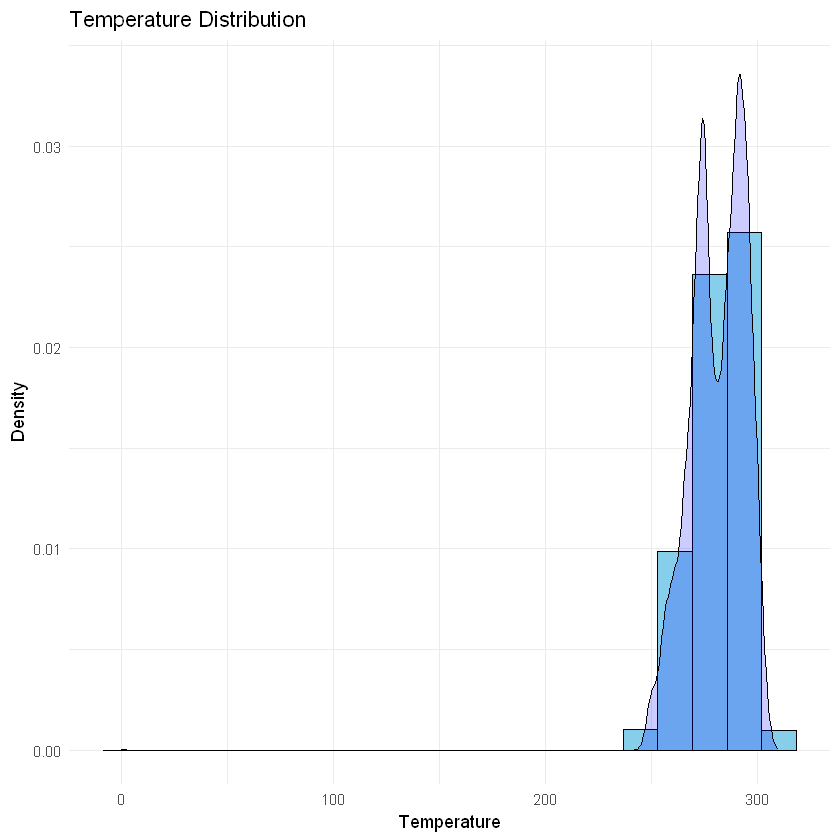

In [12]:
library(ggplot2)

# Assuming mit_df is already loaded and contains the data
temperature_data <- mit_df$temp
traffic_volume_data <- mit_df$traffic_volume

# Creating the histogram with KDE
ggplot(mit_df, aes(x = temp)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "skyblue", color = "black") +
  geom_density(alpha = .2, fill = "blue") +
  labs(title = "Temperature Distribution",
       x = "Temperature",
       y = "Density") +
  theme_minimal()


In [13]:
# Assuming 'temp' and 'traffic_volume' are columns in the 'mit_df' data frame
temperature_data <- mit_df$temp
traffic_volume_data <- mit_df$traffic_volume

# Calculating the correlation between temperature and traffic volume
correlation <- cor(temperature_data, traffic_volume_data, use = "complete.obs")

# Printing the correlation
print(paste("Correlation between Temperature and Traffic Volume:", correlation))


[1] "Correlation between Temperature and Traffic Volume: 0.130298798171127"


In [14]:
# Assuming 'rain_1h' is the column for rain data in 'mit_df'
rain_data <- mit_df$rain_1h

# Calculating Q1, Q3, and IQR for the 'rain_1h' data
Q1 <- quantile(rain_data, 0.25, na.rm = TRUE)
Q3 <- quantile(rain_data, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Defining bounds for outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Removing outliers
mit_cleaned_data <- mit_df %>% 
  filter(rain_1h <= upper_bound)

# Printing the number of rows before and after removing outliers
print(paste("Number of rows before removing outliers:", nrow(mit_df)))
print(paste("Number of rows after removing outliers:", nrow(mit_cleaned_data)))


[1] "Number of rows before removing outliers: 48204"
[1] "Number of rows after removing outliers: 44737"


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tenyj\AppData\Local\R\win-library\4.3\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\tenyj\AppData\Local\R\win-library\4.3\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"restored 'lubridate'"



The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpMfg7X2\downloaded_packages


Warning message:
"package 'lubridate' was built under R version 4.3.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




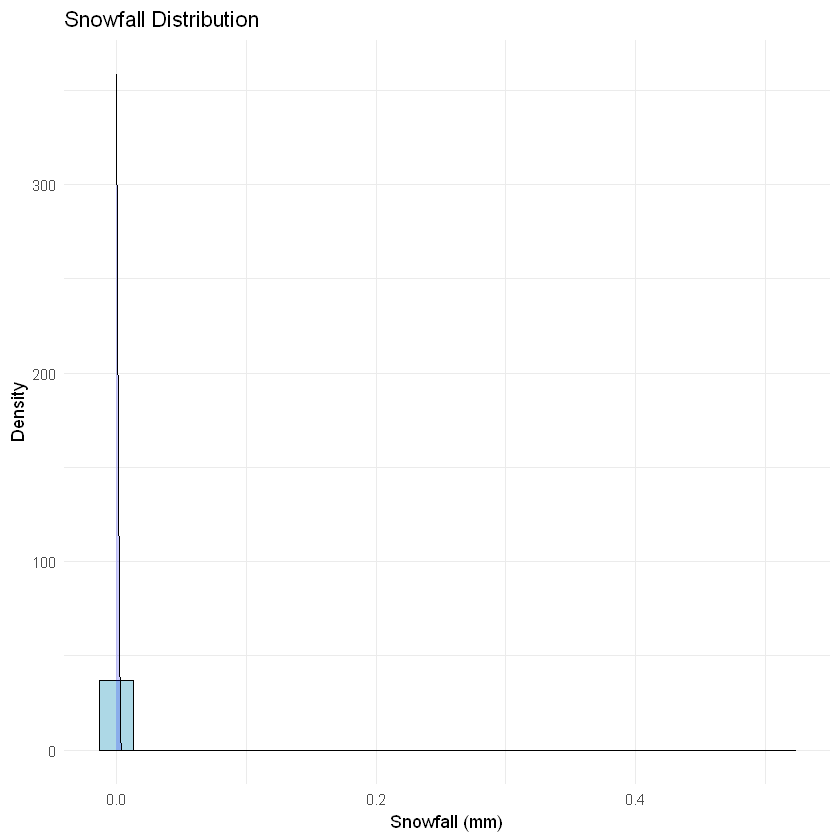

In [15]:
install.packages("lubridate")
library(lubridate)
# Assuming snow_data is a column 'snow_1h' in 'mit_df'
snow_data <- mit_df$snow_1h

# Plotting histogram with KDE
ggplot(mit_df, aes(x = snow_1h)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "lightblue", color = "black") +
  geom_density(alpha = .2, fill = "blue") +
  labs(title = "Snowfall Distribution",
       x = "Snowfall (mm)",
       y = "Density") +
  theme_minimal()


In [16]:
# Splitting data based on snowfall being zero or non-zero
zero_snowfall_data <- snow_data[snow_data == 0]
non_zero_snowfall_data <- snow_data[snow_data > 0]

# Printing summary statistics
cat("Summary Statistics for Zero Snowfall:\n")
print(summary(zero_snowfall_data))

cat("\nSummary Statistics for Non-Zero Snowfall:\n")
print(summary(non_zero_snowfall_data))


Summary Statistics for Zero Snowfall:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Summary Statistics for Non-Zero Snowfall:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0500  0.0600  0.1000  0.1702  0.2500  0.5100 


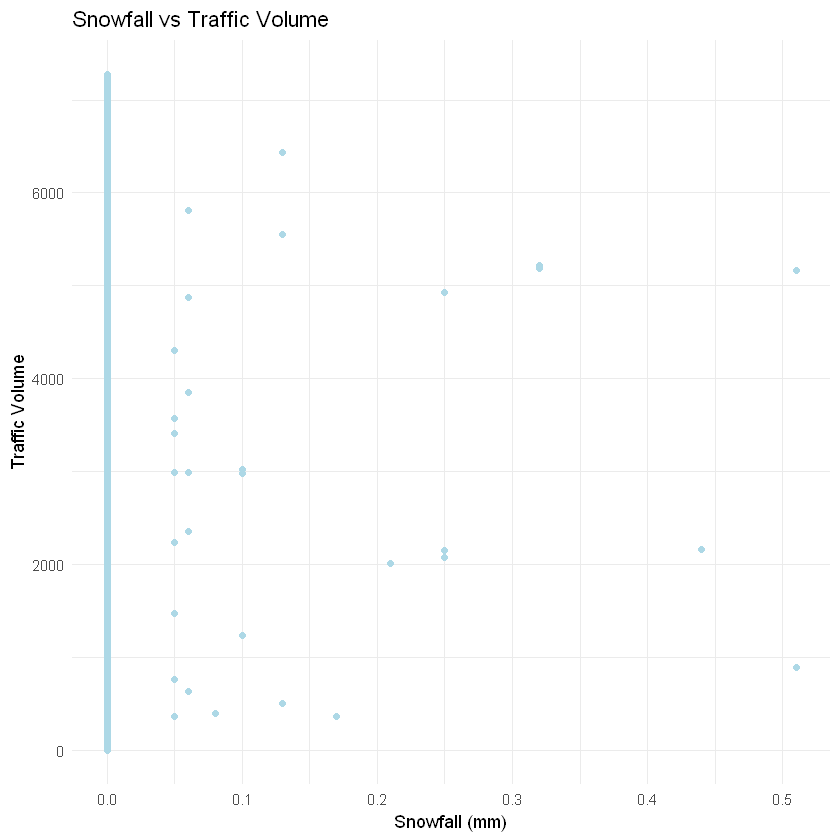

In [17]:
# Scatter plot of Snowfall vs. Traffic Volume
ggplot(mit_df, aes(x = snow_1h, y = traffic_volume)) +
  geom_point(color = "lightblue") +
  labs(title = "Snowfall vs Traffic Volume",
       x = "Snowfall (mm)",
       y = "Traffic Volume") +
  theme_minimal()


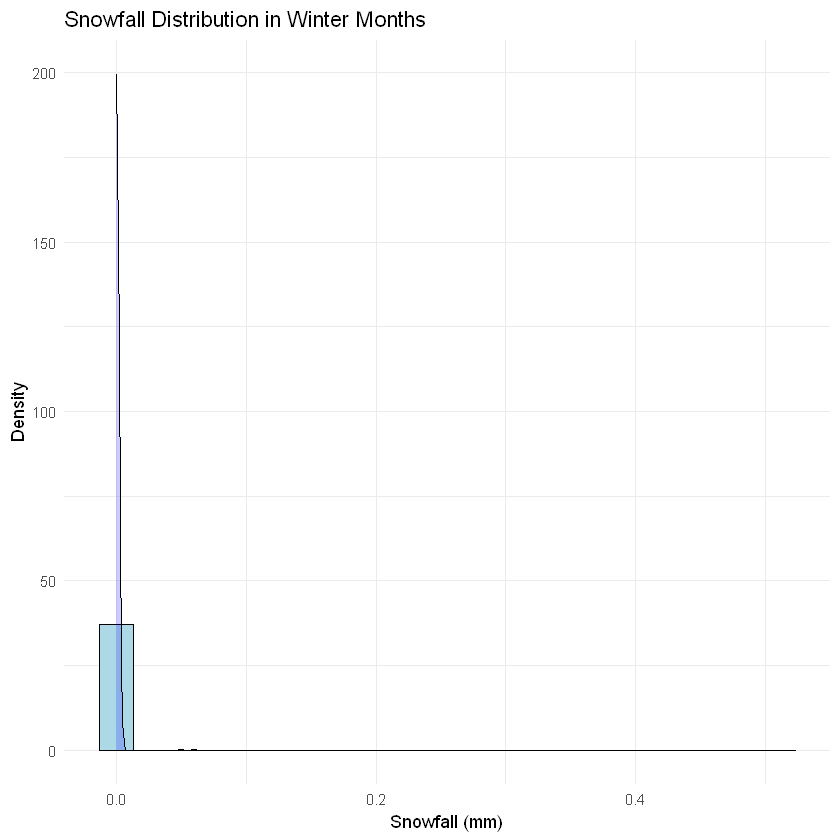

In [18]:
# Filtering data for winter months
winter_months <- c(12, 1, 2, 3)
winter_snow_data <- mit_df %>% 
  filter(month(ymd_hms(date_time)) %in% winter_months) %>%
  pull(snow_1h)

ggplot(data = data.frame(snow_1h = winter_snow_data), aes(x = snow_1h)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "lightblue", color = "black") +
  geom_density(alpha = .2, fill = "blue") +
  labs(title = "Snowfall Distribution in Winter Months",
       x = "Snowfall (mm)",
       y = "Density") +
  theme_minimal()


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpMfg7X2\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.92 loaded



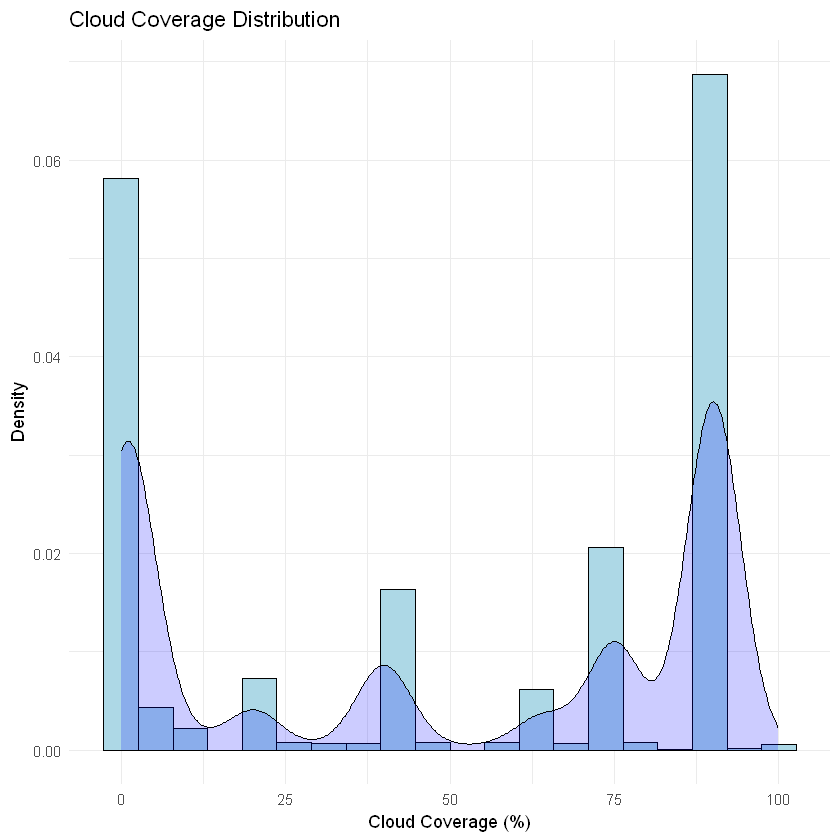

In [19]:
install.packages("corrplot")
library(corrplot)
cloud_coverage_data <- mit_df$clouds_all

ggplot(mit_df, aes(x = clouds_all)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "lightblue", color = "black") +
  geom_density(alpha = .2, fill = "blue") +
  labs(title = "Cloud Coverage Distribution",
       x = "Cloud Coverage (%)",
       y = "Density") +
  theme_minimal()


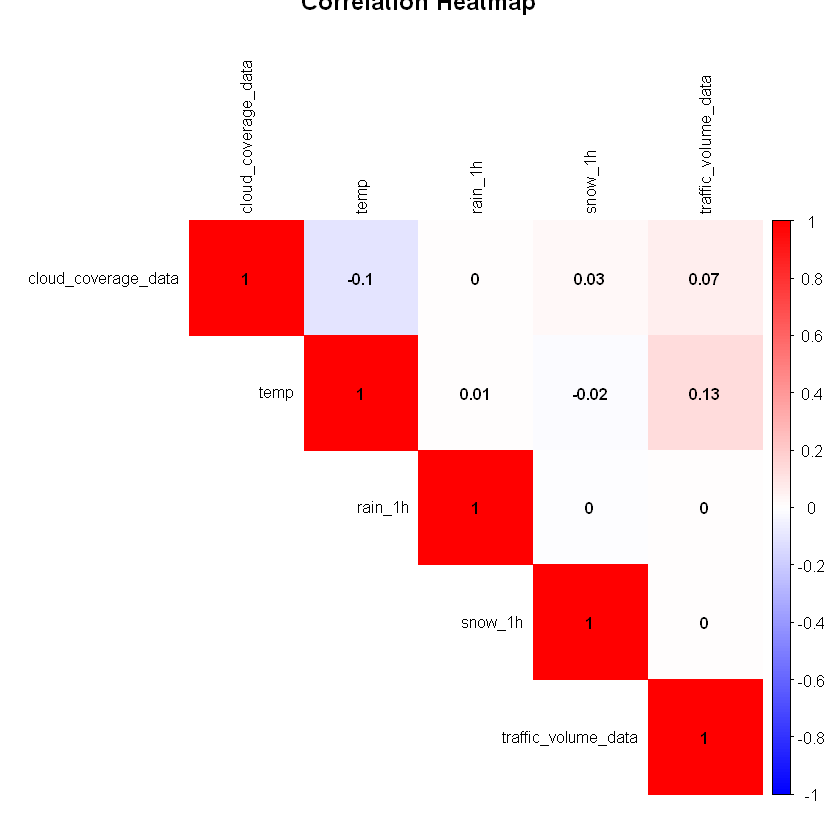

In [20]:
weather_data <- mit_df[, c("temp", "rain_1h", "snow_1h")]
traffic_volume_data <- mit_df$traffic_volume

correlation_data <- cbind(cloud_coverage_data, weather_data, traffic_volume_data)
correlation_matrix <- cor(correlation_data, use = "complete.obs")
# heatmap
corrplot(correlation_matrix, method = "color", type = "upper", tl.col = "black", 
         tl.cex = 0.8, cl.cex = 0.8, number.cex = 0.8,
         title = "Correlation Heatmap", addCoef.col = "black", 
         col = colorRampPalette(c("blue", "white", "red"))(200))


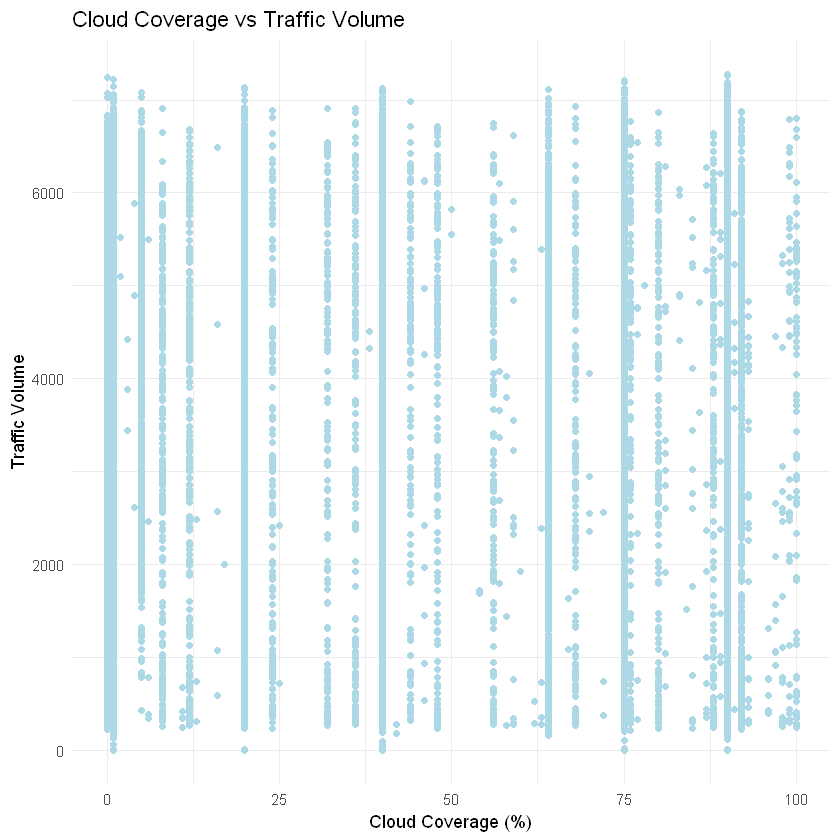

In [21]:
ggplot(mit_df, aes(x = clouds_all, y = traffic_volume)) +
  geom_point(color = "lightblue") +
  labs(title = "Cloud Coverage vs Traffic Volume",
       x = "Cloud Coverage (%)",
       y = "Traffic Volume") +
  theme_minimal()


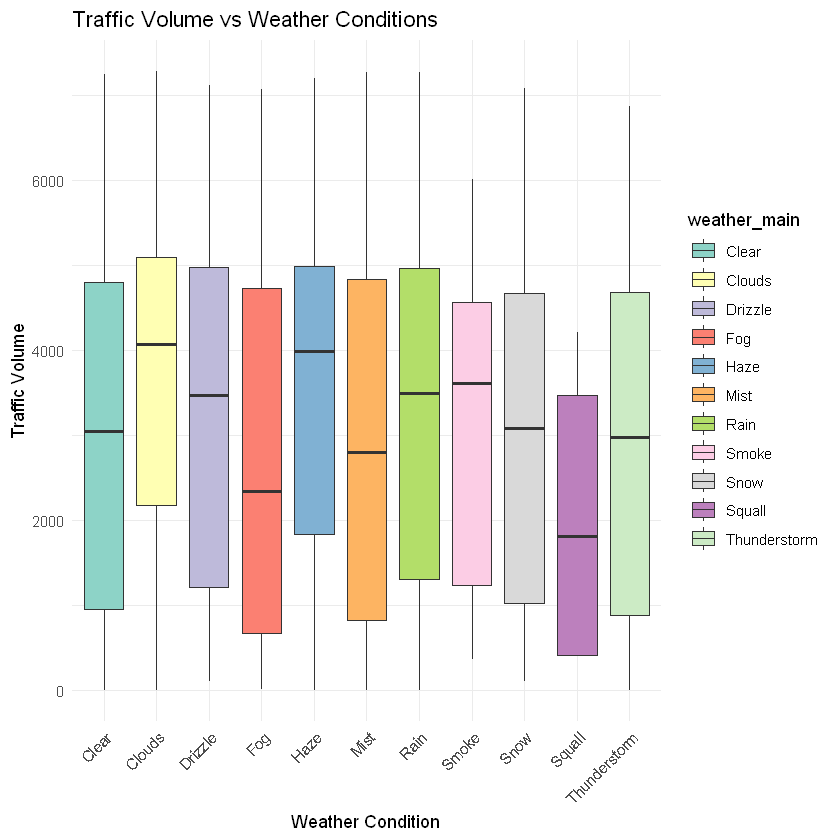

In [22]:
# Box plot to visualize the impact on traffic volume
ggplot(mit_df, aes(x = weather_main, y = traffic_volume, fill = weather_main)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set3") +
  labs(title = "Traffic Volume vs Weather Conditions",
       x = "Weather Condition",
       y = "Traffic Volume") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [23]:
# Converting 'date_time' to POSIXct date-time format
mit_df$date_time <- as.POSIXct(mit_df$date_time, format = "%Y-%m-%d %H:%M:%S")

# Extracting hour, day of the week, and month
mit_df$hour <- hour(mit_df$date_time)
mit_df$day_of_week <- wday(mit_df$date_time, label = TRUE)  # Automatically labels days
mit_df$month <- month(mit_df$date_time, label = TRUE, abbr = TRUE)  # Automatically labels months


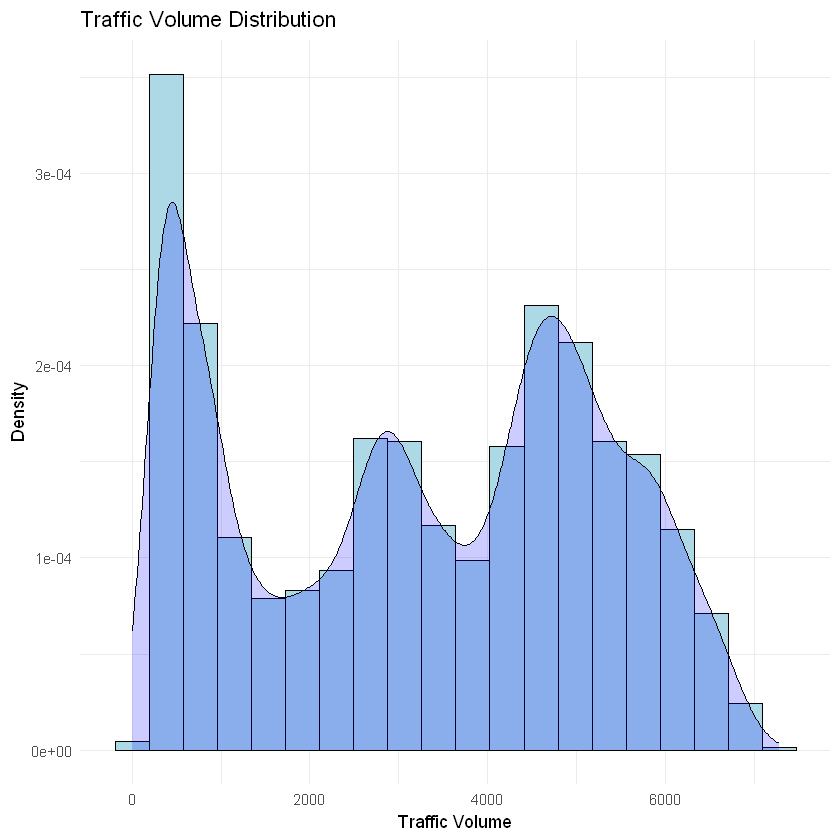

In [25]:
# Assuming traffic_volume_data is a column in 'mit_df'
traffic_volume_data <- mit_df$traffic_volume

# Histogram with KDE
ggplot(mit_df, aes(x = traffic_volume)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "lightblue", color = "black") +
  geom_density(alpha = .2, fill = "blue") +
  labs(title = "Traffic Volume Distribution",
       x = "Traffic Volume",
       y = "Density") +
  theme_minimal()


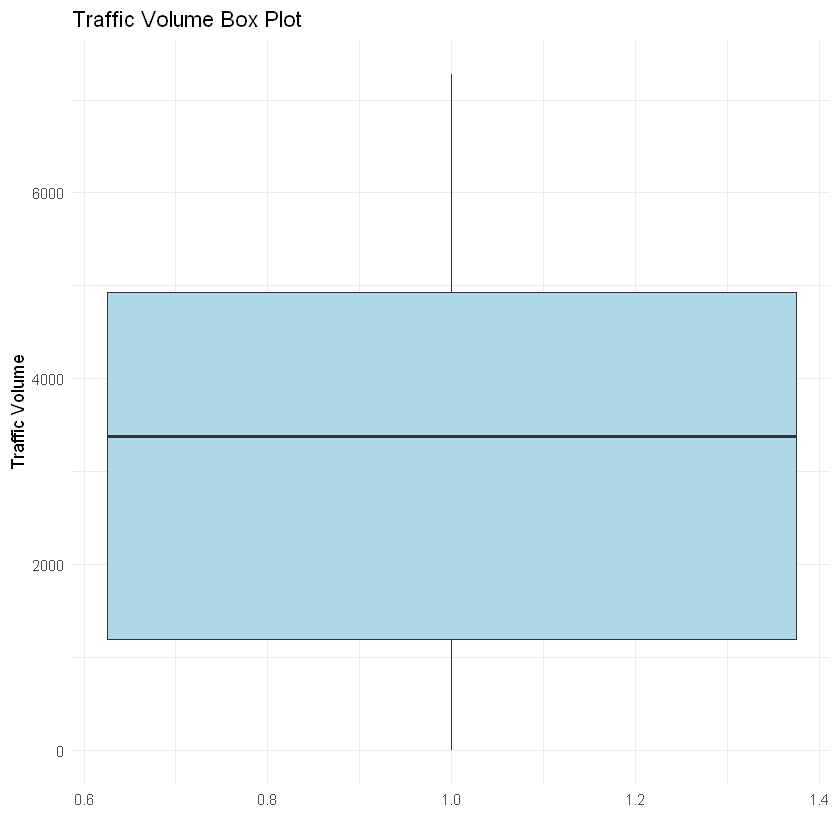

In [26]:
# Box plot to detect outliers
ggplot(mit_df, aes(x = 1, y = traffic_volume)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Traffic Volume Box Plot",
       x = "",  # No x-axis label necessary as there's only one category
       y = "Traffic Volume") +
  theme_minimal()


In [27]:
mit_df$date_time <- as.POSIXct(mit_df$date_time, format = "%Y-%m-%d %H:%M:%S")
mit_df$hour <- hour(mit_df$date_time)


In [28]:
mit_df <- mit_df %>%
  mutate(temp_rain_interaction = temp * rain_1h)


In [29]:
mit_df <- mit_df %>%
  mutate(across(c(temp, rain_1h), scale))


In [30]:
install.packages("fastDummies")

library(fastDummies)

Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'fastDummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpMfg7X2\downloaded_packages


Warning message:
"package 'fastDummies' was built under R version 4.3.3"
Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



In [31]:
# Using fastDummies to create dummy variables
mit_df_encoded <- dummy_cols(mit_df, select_columns = c("holiday", "weather_main", "weather_description"), remove_selected_columns = TRUE)


In [32]:
head(mit_df_encoded)


,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,hour,day_of_week,month,temp_rain_interaction,⋯,weather_description_smoke,weather_description_snow,weather_description_SQUALLS,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
,<dbl>,<dbl>,<dbl>,<int>,<dttm>,<int>,<int>,<ord>,<ord>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0.5303649,-0.007463059,0,40,2012-10-02 09:00:00,5545,9,Tue,Oct,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0.6113351,-0.007463059,0,75,2012-10-02 10:00:00,4516,10,Tue,Oct,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0.6278291,-0.007463059,0,90,2012-10-02 11:00:00,4767,11,Tue,Oct,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0.6690639,-0.007463059,0,90,2012-10-02 12:00:00,5026,12,Tue,Oct,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0.7447861,-0.007463059,0,75,2012-10-02 13:00:00,4918,13,Tue,Oct,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0.7882701,-0.007463059,0,1,2012-10-02 14:00:00,5181,14,Tue,Oct,0,⋯,0,0,0,0,0,0,0,0,0,0


In [33]:
# Removing 'date_time' column using base R
mit_df_encoded$date_time <- NULL


In [34]:
# Convert all columns to integer using dplyr
mit_df_encoded <- mit_df_encoded %>%
  mutate(across(everything(), as.integer))


In [35]:
mit_df_encoded

temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,day_of_week,month,temp_rain_interaction,holiday_0,⋯,weather_description_smoke,weather_description_snow,weather_description_SQUALLS,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,40,5545,9,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,75,4516,10,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,90,4767,11,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,90,5026,12,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,75,4918,13,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,5181,14,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,5584,15,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,6015,16,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,20,5791,17,3,10,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [36]:
colSums(is.na(mit_df_encoded))

temp 
                                                      0 
                                                rain_1h 
                                                      0 
                                                snow_1h 
                                                      0 
                                             clouds_all 
                                                      0 
                                         traffic_volume 
                                                      0 
                                                   hour 
                                                     10 
                                            day_of_week 
                                                     10 
                                                  month 
                                                     10 
                                  temp_rain_interaction 
                                                      0 
                                              holiday_0 
                                                      0 
                                              holiday_1 
                                                      0 
                                     weather_main_Clear 
                                                      0 
                                    weather_main_Clouds 
                                                      0 
                                   weather_main_Drizzle 
                                                      0 
                                       weather_main_Fog 
                                                      0 
                                      weather_main_Haze 
                                                      0 
                                      weather_main_Mist 
                                                      0 
                                      weather_main_Rain 
                                                      0 
                                     weather_main_Smoke 
                                                      0 
                                      weather_main_Snow 
                                                      0 
                                    weather_main_Squall 
                                                      0 
                              weather_main_Thunderstorm 
                                                      0 
                      weather_description_broken clouds 
                                                      0 
                            weather_description_drizzle 
                                                      0 
                         weather_description_few clouds 
                                                      0 
                                weather_description_fog 
                                                      0 
                      weather_description_freezing rain 
                                                      0 
                               weather_description_haze 
                                                      0 
            weather_description_heavy intensity drizzle 
                                                      0 
               weather_description_heavy intensity rain 
                                                      0 
                         weather_description_heavy snow 
                                                      0 
            weather_description_light intensity drizzle 
                                                      0 
        weather_description_light intensity shower rain 
                                                      0 
                         weather_description_light rain 
                                                      0 
                weather_description_light rain and snow 
                                                      0 
                  weather_description_light shower snow 
    

In [37]:
# Impute NAs using the median for each column
mit_df_encoded <- mit_df_encoded %>%
  mutate(across(where(is.numeric), ~ ifelse(is.na(.), median(., na.rm = TRUE), .)))

# Confirm no more NAs
colSums(is.na(mit_df_encoded))

temp 
                                                      0 
                                                rain_1h 
                                                      0 
                                                snow_1h 
                                                      0 
                                             clouds_all 
                                                      0 
                                         traffic_volume 
                                                      0 
                                                   hour 
                                                      0 
                                            day_of_week 
                                                      0 
                                                  month 
                                                      0 
                                  temp_rain_interaction 
                                                      0 
                                              holiday_0 
                                                      0 
                                              holiday_1 
                                                      0 
                                     weather_main_Clear 
                                                      0 
                                    weather_main_Clouds 
                                                      0 
                                   weather_main_Drizzle 
                                                      0 
                                       weather_main_Fog 
                                                      0 
                                      weather_main_Haze 
                                                      0 
                                      weather_main_Mist 
                                                      0 
                                      weather_main_Rain 
                                                      0 
                                     weather_main_Smoke 
                                                      0 
                                      weather_main_Snow 
                                                      0 
                                    weather_main_Squall 
                                                      0 
                              weather_main_Thunderstorm 
                                                      0 
                      weather_description_broken clouds 
                                                      0 
                            weather_description_drizzle 
                                                      0 
                         weather_description_few clouds 
                                                      0 
                                weather_description_fog 
                                                      0 
                      weather_description_freezing rain 
                                                      0 
                               weather_description_haze 
                                                      0 
            weather_description_heavy intensity drizzle 
                                                      0 
               weather_description_heavy intensity rain 
                                                      0 
                         weather_description_heavy snow 
                                                      0 
            weather_description_light intensity drizzle 
                                                      0 
        weather_description_light intensity shower rain 
                                                      0 
                         weather_description_light rain 
                                                      0 
                weather_description_light rain and snow 
                                                      0 
                  weather_description_light shower snow 
    

In [38]:
# Saving the data frame to a CSV file
write.csv(mit_df_encoded, "R_Preprocessed_Metro_Interstate_Traffic_Volume.csv", row.names = TRUE)

In [39]:
install.packages("randomForest")
install.packages("caret")

library(randomForest)
library(caret)


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tenyj\AppData\Local\R\win-library\4.3\00LOCK\randomForest\libs\x64\randomForest.dll to C:\Users\tenyj\AppData\Local\R\win-library\4.3\randomForest\libs\x64\randomForest.dll: Permission denied"
Warning message:
"restored 'randomForest'"



The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpMfg7X2\downloaded_packages


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tenyj\AppData\Local\R\win-library\4.3\00LOCK\caret\libs\x64\caret.dll to C:\Users\tenyj\AppData\Local\R\win-library\4.3\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpMfg7X2\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice



In [40]:
# Set seed for reproducibility, same as random_state in Python
set.seed(42)

# Splitting the dataset into training and testing sets using caret
trainIndex <- createDataPartition(mit_df_encoded$traffic_volume, p = 0.7, list = FALSE, times = 1)
trainData <- mit_df_encoded[trainIndex, ]
testData <- mit_df_encoded[-trainIndex, ]

# Separating predictors and response
X_train <- trainData[, !(names(trainData) %in% c("traffic_volume"))]
y_train <- trainData$traffic_volume
X_test <- testData[, !(names(testData) %in% c("traffic_volume"))]
y_test <- testData$traffic_volume


In [41]:
set.seed(42)

rf_model <- randomForest(X_train, y_train, ntree = 100)


In [42]:
print(rf_model)


Call:
 randomForest(x = X_train, y = y_train, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 19

          Mean of squared residuals: 248173.5
                    % Var explained: 93.72


In [43]:
# predictions
predictions <- predict(rf_model, X_test)

rmse <- sqrt(mean((predictions - y_test)^2))
r2 <- cor(predictions, y_test)^2

print(paste("RMSE:", rmse))
print(paste("R^2:", r2))


[1] "RMSE: 502.618873886111"
[1] "R^2: 0.938120269037994"


In [44]:
# MSE
mse_rf <- mean((y_test - predictions)^2)
cat(sprintf("Random Forest MSE: %f", mse_rf))


Random Forest MSE: 252625.732387

In [45]:
library(Metrics)

#  MAE
mae<- mae(y_test,predictions)
print(paste("Mean Absolute Error (MAE):", mae))

Warning message:
"package 'Metrics' was built under R version 4.3.3"

Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




[1] "Mean Absolute Error (MAE): 319.771436768012"


Warning message:
"package 'ggplot2' is in use and will not be installed"


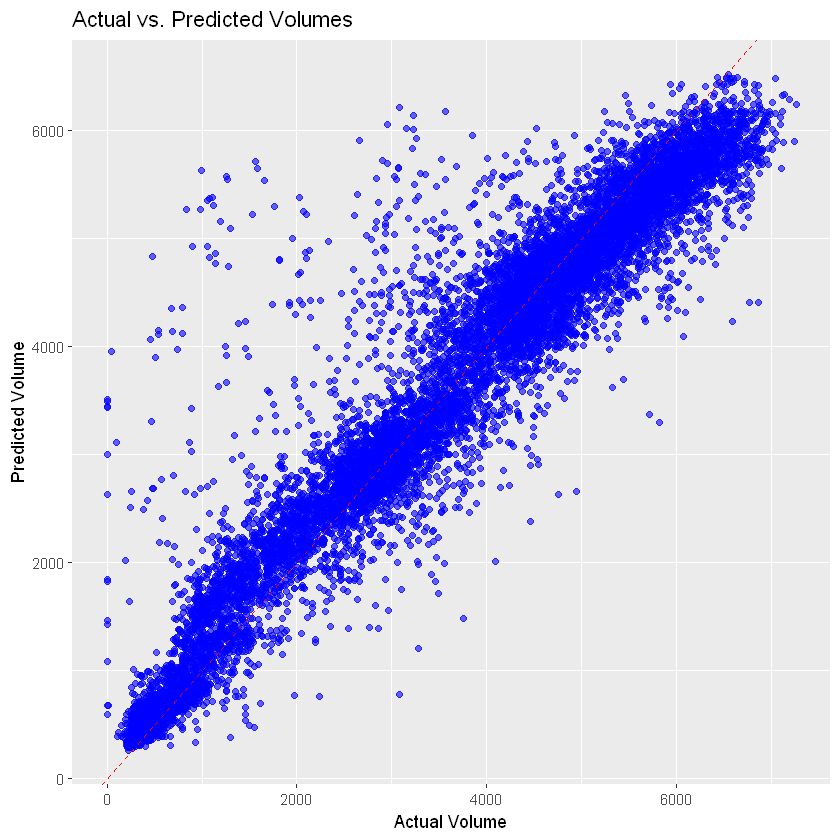

In [46]:
install.packages("ggplot2")
library(ggplot2)


plot_data <- data.frame(Actual_Prices = y_test, Predicted_Prices = predictions)

# Create the scatter plot
scatter_plot <- ggplot(plot_data, aes(x = Actual_Prices, y = Predicted_Prices)) +
                geom_point(alpha = 0.6,color='blue') +
                geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
                labs(x = "Actual Volume", y = "Predicted Volume", title = "Actual vs. Predicted Volumes")

# Display the scatter plot
print(scatter_plot)


In [47]:
y_train_pred <- predict(rf_model, X_train)

y_test_pred <- predict(rf_model, X_test)


Warning message:
"package 'gridExtra' is in use and will not be installed"


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


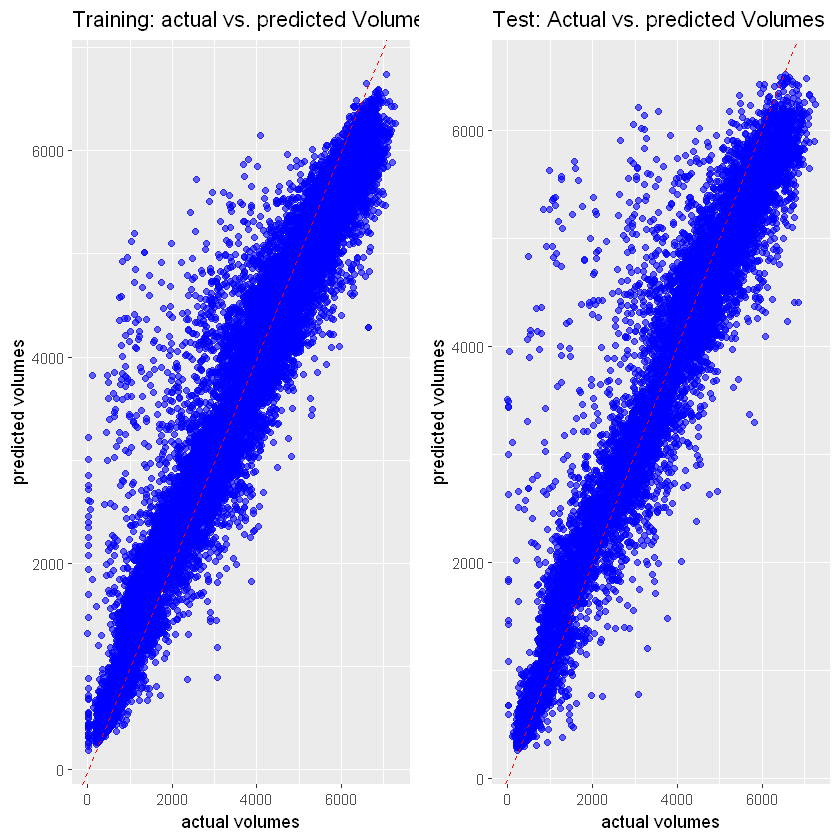

In [48]:
install.packages("gridExtra")
library(gridExtra)

train_plot_data <- data.frame(Actual_Prices = y_train, Predicted_Prices = y_train_pred)

test_plot_data <- data.frame(Actual_Prices = y_test, Predicted_Prices = y_test_pred)

train_plot <- ggplot(train_plot_data, aes(x = Actual_Prices, y = Predicted_Prices)) +
              geom_point(alpha = 0.6,color='blue') +
              geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
              labs(title = "Training: actual vs. predicted Volumes", x = "actual volumes", y = "predicted volumes")

test_plot <- ggplot(test_plot_data, aes(x = Actual_Prices, y = Predicted_Prices)) +
             geom_point(alpha = 0.6,color='blue') +
             geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
             labs(title = "Test: Actual vs. predicted Volumes", x = "actual volumes", y = "predicted volumes")

multiplot <- grid.arrange(train_plot, test_plot, nrow = 1)
print(multiplot)
